# Time operations

Time operations are notoriously difficult. In this notebook we go through some of scmdata's time operation capabilities.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import datetime as dt
import traceback

import scmdata.time
from scmdata import ScmRun, run_append

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

## Data

Here we use the RCP26 emissions data. This originally came from http://www.pik-potsdam.de/~mmalte/rcps/ and has since been re-written into a format which can be read by scmdata using the [pymagicc](https://github.com/openclimatedata/pymagicc) library. We are not currently planning on importing Pymagicc's readers into scmdata by default, please raise an issue [here](https://github.com/openscm/scmdata/issues) if you would like us to consider doing so.

In [2]:
var_to_plot = "Emissions|BC"

rcp26 = ScmRun("rcp26_emissions.csv")
rcp26["time operation"] = "raw"

<AxesSubplot:xlabel='time', ylabel='Mt BC / yr'>

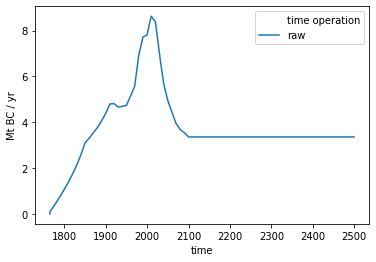

In [3]:
rcp26.filter(variable=var_to_plot).lineplot(hue="time operation")

For illustrative purposes, we shift the time points of the raw data before moving on.

In [4]:
rcp26["time"] = rcp26["time"].map(lambda x: dt.datetime(x.year, 3, 17))
rcp26 = ScmRun(rcp26)
rcp26.head()

time                                                                1765-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.000000   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010763   

time                                                                1766-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.106998   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010752   

time                                                                1767-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.133383   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010748   

time                                                                1768-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.159847   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010744   

time                                                                1769-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.186393   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010740   

time                                                                1770-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.213024   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010736   

time                                                                1771-03-17 00:00:00  \
model scenario region variable        unit          time operation               

## Resampling

The first method to consider is `resample`. This allows us to resample a dataframe onto different timesteps. Below, we resample the data onto monthly timesteps.

In [5]:
rcp26_monthly = rcp26.resample("MS")
rcp26_monthly["time operation"] = "start of month"
rcp26_monthly.head()

time                                                                1765-03-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of month            -0.004690   
                      Emissions|C2F6  kt C2F6 / yr  start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   start of month             0.010763   

time                                                                1765-04-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of month             0.004397   
                      Emissions|C2F6  kt C2F6 / yr  start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   start of month             0.010762   

time                                                                1765-05-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of month             0.013192   
                      Emissions|C2F6  kt C2F6 / yr  start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   start of month             0.010761   

time                                                                1765-06-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of month             0.022279   
                      Emissions|C2F6  kt C2F6 / yr  start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   start of month             0.010761   

time                                                                1765-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of month             0.031073   
                      Emissions|C2F6  kt C2F6 / yr  start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   start of month             0.010760   

time                                                                1765-08-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of month             0.040161   
                      Emissions|C2F6  kt C2F6 / yr  start of month             0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of month             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of month             0.000000   
                      Emissions|CF4   kt CF4 / yr   start of month             0.010759   

time                                                                1765-09-01 00:00:00  \
model scenario region variable        unit          time operation               

We can also resample to e.g. start of year or end of year.

In [6]:
rcp26_end_of_year = rcp26.resample("A")
rcp26_end_of_year["time operation"] = "end of year"
rcp26_end_of_year.head()

time                                                                1764-12-31 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    end of year               -0.022279   
                      Emissions|C2F6  kt C2F6 / yr  end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   end of year                0.010765   

time                                                                1765-12-31 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    end of year                0.084719   
                      Emissions|C2F6  kt C2F6 / yr  end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   end of year                0.010754   

time                                                                1766-12-31 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    end of year                0.127889   
                      Emissions|C2F6  kt C2F6 / yr  end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   end of year                0.010749   

time                                                                1767-12-31 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    end of year                0.154279   
                      Emissions|C2F6  kt C2F6 / yr  end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   end of year                0.010745   

time                                                                1768-12-31 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    end of year                0.180866   
                      Emissions|C2F6  kt C2F6 / yr  end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   end of year                0.010741   

time                                                                1769-12-31 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    end of year                0.207479   
                      Emissions|C2F6  kt C2F6 / yr  end of year                0.000000   
                      Emissions|C6F14 kt C6F14 / yr end of year                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  end of year                0.000000   
                      Emissions|CF4   kt CF4 / yr   end of year                0.010736   

time                                                                1770-12-31 00:00:00  \
model scenario region variable        unit          time operation               

In [7]:
rcp26_start_of_year = rcp26.resample("AS")
rcp26_start_of_year["time operation"] = "start of year"
rcp26_start_of_year.head()

time                                                                1765-01-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of year             -0.021986   
                      Emissions|C2F6  kt C2F6 / yr  start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   start of year              0.010765   

time                                                                1766-01-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of year              0.085012   
                      Emissions|C2F6  kt C2F6 / yr  start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   start of year              0.010754   

time                                                                1767-01-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of year              0.127961   
                      Emissions|C2F6  kt C2F6 / yr  start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   start of year              0.010749   

time                                                                1768-01-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of year              0.154351   
                      Emissions|C2F6  kt C2F6 / yr  start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   start of year              0.010745   

time                                                                1769-01-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of year              0.180938   
                      Emissions|C2F6  kt C2F6 / yr  start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   start of year              0.010741   

time                                                                1770-01-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    start of year              0.207552   
                      Emissions|C2F6  kt C2F6 / yr  start of year              0.000000   
                      Emissions|C6F14 kt C6F14 / yr start of year              0.000000   
                      Emissions|CCl4  kt CCl4 / yr  start of year              0.000000   
                      Emissions|CF4   kt CF4 / yr   start of year              0.010736   

time                                                                1771-01-01 00:00:00  \
model scenario region variable        unit          time operation               

## Interpolating

Not all time points are supported by resampling. If we want to use custom time points (e.g. middle of year), we can do that with interpolate.

In [8]:
rcp26_middle_of_year = rcp26.interpolate(
    target_times=sorted(
        [dt.datetime(v, 7, 1) for v in set([v.year for v in rcp26["time"]])]
    )
)
rcp26_middle_of_year["time operation"] = "middle of year"
rcp26_middle_of_year.head()

time                                                                1765-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    middle of year             0.031073   
                      Emissions|C2F6  kt C2F6 / yr  middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   middle of year             0.010760   

time                                                                1766-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    middle of year             0.114660   
                      Emissions|C2F6  kt C2F6 / yr  middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   middle of year             0.010751   

time                                                                1767-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    middle of year             0.141047   
                      Emissions|C2F6  kt C2F6 / yr  middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   middle of year             0.010747   

time                                                                1768-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    middle of year             0.167556   
                      Emissions|C2F6  kt C2F6 / yr  middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   middle of year             0.010743   

time                                                                1769-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    middle of year             0.194127   
                      Emissions|C2F6  kt C2F6 / yr  middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   middle of year             0.010738   

time                                                                1770-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    middle of year             0.220783   
                      Emissions|C2F6  kt C2F6 / yr  middle of year             0.000000   
                      Emissions|C6F14 kt C6F14 / yr middle of year             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  middle of year             0.000000   
                      Emissions|CF4   kt CF4 / yr   middle of year             0.010734   

time                                                                1771-07-01 00:00:00  \
model scenario region variable        unit          time operation               

## Extrapolating

Extrapolating is also supported by scmdata.

In [9]:
rcp26_extrap = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)])
)
rcp26_extrap["time operation"] = "extrapolated"
rcp26_extrap.head()

time                                                                1700-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.928487   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011454   

time                                                                1701-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.821489   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011443   

time                                                                1702-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.714491   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011432   

time                                                                1703-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.607493   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011422   

time                                                                1704-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.500202   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011411   

time                                                                1705-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.393204   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011400   

time                                                                1706-07-01 00:00:00  \
model scenario region variable        unit          time operation               

In [10]:
rcp26_extrap_const = rcp26.interpolate(
    target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
    extrapolation_type="constant",
)
rcp26_extrap_const["time operation"] = "extrapolated constant"
rcp26_extrap_const.head()

time                                                                       1700-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1701-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1702-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1703-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1704-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1705-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant  

In [11]:
rcp26.head()

time                                                                1765-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.000000   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010763   

time                                                                1766-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.106998   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010752   

time                                                                1767-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.133383   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010748   

time                                                                1768-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.159847   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010744   

time                                                                1769-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.186393   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010740   

time                                                                1770-03-17 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    raw                        0.213024   
                      Emissions|C2F6  kt C2F6 / yr  raw                        0.000000   
                      Emissions|C6F14 kt C6F14 / yr raw                        0.000000   
                      Emissions|CCl4  kt CCl4 / yr  raw                        0.000000   
                      Emissions|CF4   kt CF4 / yr   raw                        0.010736   

time                                                                1771-03-17 00:00:00  \
model scenario region variable        unit          time operation               

In [12]:
rcp26_extrap.head()

time                                                                1700-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.928487   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011454   

time                                                                1701-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.821489   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011443   

time                                                                1702-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.714491   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011432   

time                                                                1703-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.607493   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011422   

time                                                                1704-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.500202   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011411   

time                                                                1705-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated              -6.393204   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated               0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated               0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated               0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated               0.011400   

time                                                                1706-07-01 00:00:00  \
model scenario region variable        unit          time operation               

In [13]:
rcp26_extrap_const.head()

time                                                                       1700-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1701-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1702-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1703-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1704-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant             0.000000   
                      Emissions|CF4   kt CF4 / yr   extrapolated constant             0.010763   

time                                                                       1705-07-01 00:00:00  \
model scenario region variable        unit          time operation                               
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    extrapolated constant             0.000000   
                      Emissions|C2F6  kt C2F6 / yr  extrapolated constant             0.000000   
                      Emissions|C6F14 kt C6F14 / yr extrapolated constant             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  extrapolated constant  

<AxesSubplot:xlabel='time', ylabel='Mt BC / yr'>

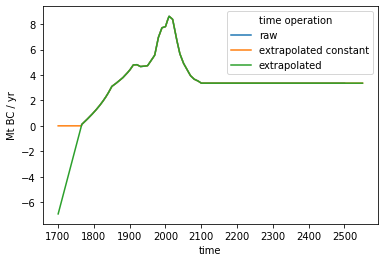

In [14]:
# NBVAL_IGNORE_OUTPUT
pdf = run_append([rcp26, rcp26_extrap, rcp26_extrap_const])

pdf.filter(variable=var_to_plot).lineplot(hue="time operation")

If we try to extrapolate beyond our source data but set `extrapolation_type=None`, we will receive an `InsufficientDataError`.

In [15]:
try:
    rcp26.interpolate(
        target_times=sorted([dt.datetime(v, 7, 1) for v in range(1700, 2551)]),
        extrapolation_type=None,
    )
except scmdata.time.InsufficientDataError:
    traceback.print_exc(limit=0, chain=False)

Traceback (most recent call last):
scmdata.time.InsufficientDataError: Target time points are outside the source time points, use an extrapolation type other than None


## Time means

With monthly data, we can then take time means. Most of the time we just want to take the annual mean. This can be done as shown below.

### Annual mean

In [16]:
rcp26_annual_mean = rcp26_monthly.time_mean("AC")
rcp26_annual_mean["time operation"] = "annual mean"
rcp26_annual_mean.head()

time                                                                1765-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean                0.035676   
                      Emissions|C2F6  kt C2F6 / yr  annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean                0.010759   

time                                                                1766-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean                0.111128   
                      Emissions|C2F6  kt C2F6 / yr  annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean                0.010751   

time                                                                1767-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean                0.139999   
                      Emissions|C2F6  kt C2F6 / yr  annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean                0.010747   

time                                                                1768-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean                0.166494   
                      Emissions|C2F6  kt C2F6 / yr  annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean                0.010743   

time                                                                1769-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean                0.193071   
                      Emissions|C2F6  kt C2F6 / yr  annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean                0.010739   

time                                                                1770-07-01 00:00:00  \
model scenario region variable        unit          time operation                        
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean                0.219724   
                      Emissions|C2F6  kt C2F6 / yr  annual mean                0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean                0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean                0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean                0.010735   

time                                                                1771-07-01 00:00:00  \
model scenario region variable        unit          time operation               

As the data is an annual mean, we put it in July 1st (which is more or less the centre of the year).

### Annual mean centred on January 1st

Sometimes we want to take annual means centred on January 1st, rather than the middle of the year. This can be done as shown.

In [17]:
rcp26_annual_mean_jan_1 = rcp26_monthly.time_mean("AS")
rcp26_annual_mean_jan_1["time operation"] = "annual mean Jan 1"
rcp26_annual_mean_jan_1.head()

time                                                                   1765-01-01 00:00:00  \
model scenario region variable        unit          time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Jan 1             0.008794   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Jan 1             0.010762   

time                                                                   1766-01-01 00:00:00  \
model scenario region variable        unit          time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Jan 1             0.077819   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Jan 1             0.010755   

time                                                                   1767-01-01 00:00:00  \
model scenario region variable        unit          time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Jan 1             0.126805   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Jan 1             0.010749   

time                                                                   1768-01-01 00:00:00  \
model scenario region variable        unit          time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Jan 1             0.153223   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Jan 1             0.010745   

time                                                                   1769-01-01 00:00:00  \
model scenario region variable        unit          time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Jan 1             0.179777   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Jan 1             0.010741   

time                                                                   1770-01-01 00:00:00  \
model scenario region variable        unit          time operation                           
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Jan 1             0.206387   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Jan 1             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Jan 1             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Jan 1             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Jan 1             0.010737   

time                                          

As the data is centred on January 1st, we put it in January 1st.

### Annual mean centred on December 31st

Sometimes we want to take annual means centred on December 31st, rather than the middle of the year. This can be done as shown.

In [18]:
rcp26_annual_mean_dec_31 = rcp26_monthly.time_mean("A")
rcp26_annual_mean_dec_31["time operation"] = "annual mean Dec 31"
rcp26_annual_mean_dec_31.head()

time                                                                    1764-12-31 00:00:00  \
model scenario region variable        unit          time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Dec 31             0.008794   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Dec 31             0.010762   

time                                                                    1765-12-31 00:00:00  \
model scenario region variable        unit          time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Dec 31             0.077819   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Dec 31             0.010755   

time                                                                    1766-12-31 00:00:00  \
model scenario region variable        unit          time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Dec 31             0.126805   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Dec 31             0.010749   

time                                                                    1767-12-31 00:00:00  \
model scenario region variable        unit          time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Dec 31             0.153223   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Dec 31             0.010745   

time                                                                    1768-12-31 00:00:00  \
model scenario region variable        unit          time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Dec 31             0.179777   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Dec 31             0.010741   

time                                                                    1769-12-31 00:00:00  \
model scenario region variable        unit          time operation                            
IMAGE RCP26    World  Emissions|BC    Mt BC / yr    annual mean Dec 31             0.206387   
                      Emissions|C2F6  kt C2F6 / yr  annual mean Dec 31             0.000000   
                      Emissions|C6F14 kt C6F14 / yr annual mean Dec 31             0.000000   
                      Emissions|CCl4  kt CCl4 / yr  annual mean Dec 31             0.000000   
                      Emissions|CF4   kt CF4 / yr   annual mean Dec 31             0.010737   

time

As the data is centred on December 31st, we put it in December 31st.

## Comparing the results

We can compare the impact of these different methods with a plot as shown below.

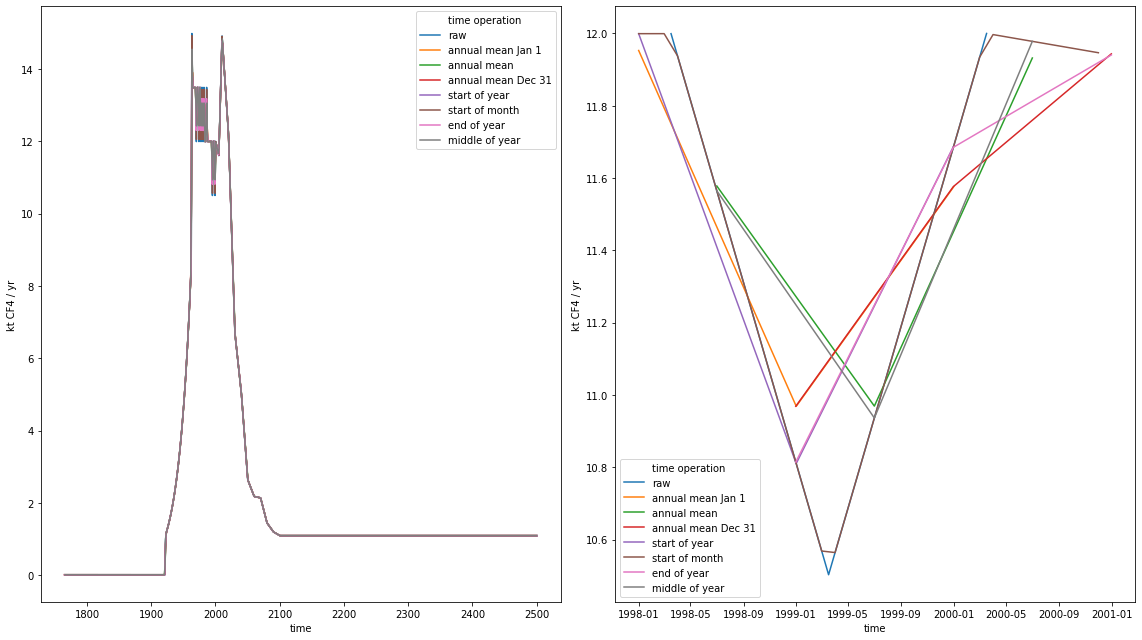

In [19]:
# NBVAL_IGNORE_OUTPUT
var_to_plot = "Emissions|CF4"
pdf = run_append(
    [
        rcp26,
        rcp26_monthly,
        rcp26_start_of_year,
        rcp26_middle_of_year,
        rcp26_end_of_year,
        rcp26_annual_mean,
        rcp26_annual_mean_jan_1,
        rcp26_annual_mean_dec_31,
    ]
)

fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).lineplot(ax=ax, hue="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).lineplot(
    ax=ax, hue="time operation"
)

plt.tight_layout()

When the timeseries is particularly noisy, the different operations result in slightly different timeseries. For example, shifting to start of month smooths the data a bit (as you're interpolating and resampling the underlying data) while taking means centred on different points in time changes your mean as you take different windows of your monthly data.

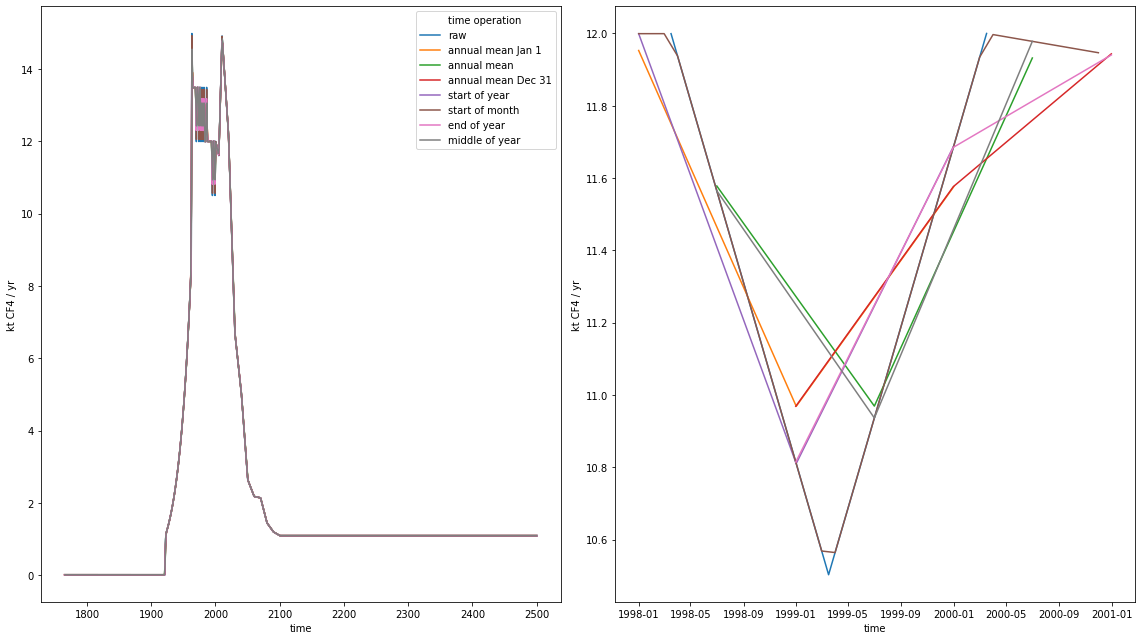

In [20]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(16, 9))

ax = fig.add_subplot(121)
pdf.filter(variable=var_to_plot).lineplot(ax=ax, hue="time operation")

ax = fig.add_subplot(122)
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).lineplot(
    ax=ax, hue="time operation", legend=False
)

plt.tight_layout()

The lines above don't match the underlying timeseries e.g. the monthly data minimum is in the wrong place.

In [21]:
# NBVAL_IGNORE_OUTPUT
rcp26_monthly.filter(
    variable=var_to_plot, year=range(1998, 2001), month=[2, 3, 4, 5]
).timeseries()

,,,,,time,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1999-02-01,1999-03-01,1999-04-01,1999-05-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01
model,scenario,region,variable,unit,time operation,,,,,,,,,,,,
IMAGE,RCP26,World,Emissions|CF4,kt CF4 / yr,start of month,11.999545,11.999564,11.938059,11.815028,10.683138,10.568309,10.564061,10.6868,11.815992,11.93464,11.997014,11.990841


<AxesSubplot:xlabel='time'>

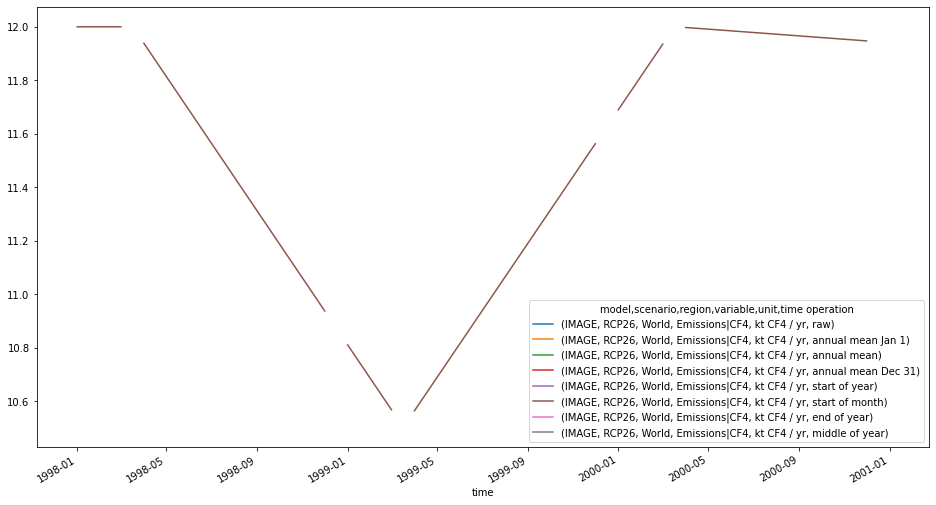

In [22]:
# NBVAL_IGNORE_OUTPUT
pdf.filter(variable=var_to_plot, year=range(1998, 2001)).timeseries().T.plot(
    figsize=(16, 9)
)

In [23]:
pdf.filter(
    variable=var_to_plot, year=range(1998, 2001)
).timeseries().T.sort_index()

model                  IMAGE                                                   \
scenario               RCP26                                                    
region                 World                                                    
variable       Emissions|CF4                                                    
unit             kt CF4 / yr                                                    
time operation           raw annual mean Jan 1 annual mean annual mean Dec 31   
time                                                                            
1998-01-01               NaN         11.953026         NaN                NaN   
1998-02-01               NaN               NaN         NaN                NaN   
1998-03-01               NaN               NaN         NaN                NaN   
1998-03-17         11.999575               NaN         NaN                NaN   
1998-04-01               NaN               NaN         NaN                NaN   
1998-05-01               NaN               NaN         NaN                NaN   
1998-06-01               NaN               NaN         NaN                NaN   
1998-07-01               NaN               NaN   11.578184                NaN   
1998-08-01               NaN               NaN         NaN                NaN   
1998-09-01               NaN               NaN         NaN                NaN   
1998-10-01               NaN               NaN         NaN                NaN   
1998-11-01               NaN               NaN         NaN                NaN   
1998-12-01               NaN               NaN         NaN                NaN   
1998-12-31               NaN               NaN         NaN          10.968734   
1999-01-01               NaN         10.968734         NaN                NaN   
1999-02-01               NaN               NaN         NaN                NaN   
1999-03-01               NaN               NaN         NaN                NaN   
1999-03-17         10.502692               NaN         NaN                NaN   
1999-04-01               NaN               NaN         NaN                NaN   
1999-05-01               NaN               NaN         NaN                NaN   
1999-06-01               NaN               NaN         NaN                NaN   
1999-07-01               NaN               NaN   10.969208                NaN   
1999-08-01               NaN               NaN         NaN                NaN   
1999-09-01               NaN               NaN         NaN                NaN   
1999-10-01               NaN               NaN         NaN                NaN   
1999-11-01               NaN               NaN         NaN                NaN   
1999-12-01               NaN               NaN         NaN                NaN   
1999-12-31               NaN               NaN         NaN          11.576366   
2000-01-01               NaN         11.576366         NaN                NaN   
2000-02-01               NaN               NaN         NaN                NaN   
2000-03-01               NaN               NaN         NaN                NaN   
2000-03-17         12.000100               NaN         NaN                NaN   
2000-04-01               NaN               NaN         NaN                NaN   
2000-05-01               NaN               NaN         NaN                NaN   
2000-06-01               NaN               NaN         NaN                NaN   
2000-07-01               NaN               NaN   11.932250                NaN   
2000-08-01               NaN               NaN         NaN                NaN   
2000-09-01               NaN               NaN         NaN                NaN   
2000-10-01               NaN               NaN         NaN                NaN   
2000-11-01               NaN               NaN         NaN                NaN   
2000-12-01               NaN               NaN         NaN                NaN   
2000-12-31               NaN               NaN         NaN          11.943668   

model                         